# Optimizing delivery with Reinforcement Learning

![](http://img.chefdentreprise.com/Img/BREVE/2018/3/328332/recette-nestor-atteindre-rentabilite-F.jpg)

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Environment definition
As for any RL problem, an environment must be designed where the Agent will evolve.<br>
For convenience and readability, we will define it like OpenAI Gym environments

In [2]:
from delivery import *

Initialized Delivery Environment with 10 random stops
Target metric for optimization is distance


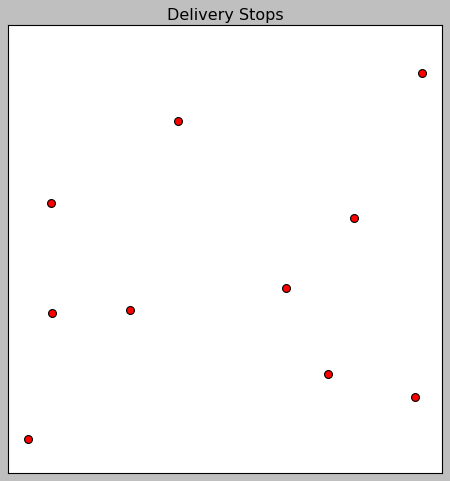

In [3]:
env = DeliveryEnvironment(n_stops = 10)

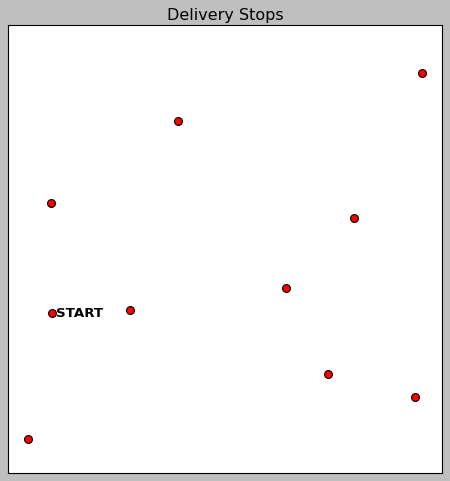

In [4]:
# Tampilkan peta awal
env.render()

In [5]:
# Cek kondisi awal perjalanan
print("Perjalanan awal:", env.stops)

Perjalanan awal: [3]


In [6]:
for i in [0,1,2,3]:
    env.step(i)

In [7]:
# Tampilkan peta setelah beberapa langkah
print("Perjalanan setelah beberapa langkah:", env.stops)

Perjalanan setelah beberapa langkah: [3, 0, 1, 2, 3]


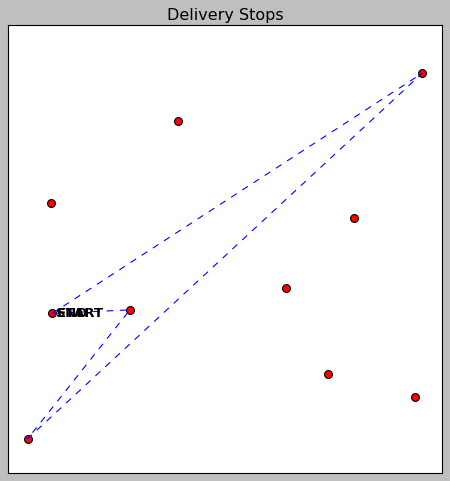

In [8]:
env.render()

In [9]:
import sys
import time
sys.path.append("../")

from delivery import run_episode,DeliveryQAgent,run_n_episodes

In [10]:
N_stops=500
N_episodes=1000

Initialized Delivery Environment with 500 random stops
Target metric for optimization is distance


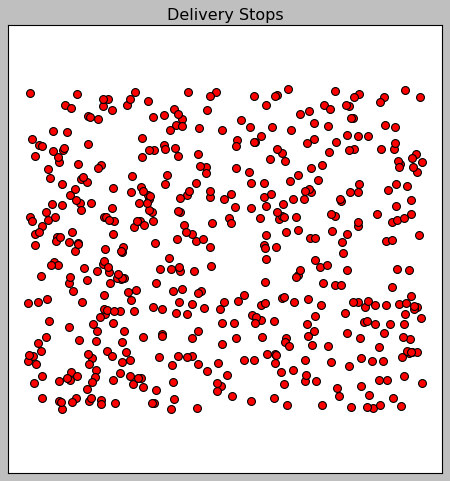

In [11]:
env = DeliveryEnvironment(n_stops = N_stops,method = "distance")

In [12]:
agent = DeliveryQAgent(env.observation_space,env.action_space)

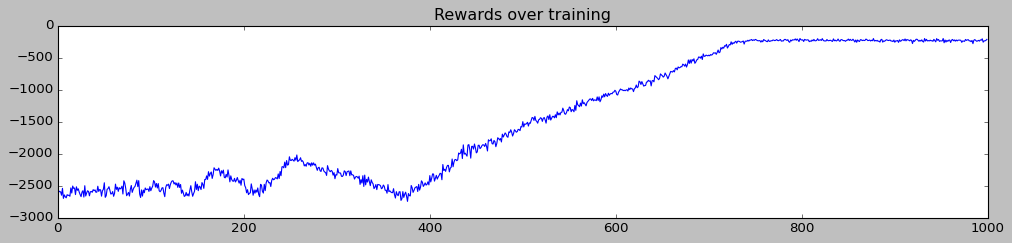

Total reward terakhir: -216.35324874536963
Rute terakhir: [229, 423, 437, 301, 293, 418, 83, 135, 131, 40, 267, 340, 164, 382, 128, 194, 10, 314, 118, 213, 348, 362, 469, 84, 361, 285, 165, 14, 89, 313, 136, 347, 22, 60, 209, 202, 38, 452, 480, 12, 212, 385, 396, 372, 421, 226, 230, 281, 312, 91, 149, 41, 435, 461, 34, 477, 113, 85, 426, 271, 354, 329, 52, 472, 450, 431, 357, 455, 254, 79, 375, 1, 367, 291, 106, 402, 326, 351, 368, 116, 27, 474, 232, 308, 298, 378, 343, 445, 392, 246, 269, 446, 33, 331, 207, 373, 409, 393, 406, 46, 376, 416, 130, 342, 50, 425, 412, 383, 156, 2, 6, 55, 404, 444, 250, 485, 193, 63, 222, 258, 251, 460, 277, 147, 430, 432, 358, 466, 434, 71, 199, 82, 65, 440, 144, 241, 11, 32, 247, 407, 3, 346, 61, 264, 224, 161, 439, 414, 72, 349, 180, 48, 316, 124, 359, 244, 408, 56, 492, 175, 478, 185, 228, 290, 4, 92, 304, 112, 433, 127, 339, 218, 57, 352, 143, 0, 197, 457, 429, 45, 384, 43, 242, 107, 122, 70, 78, 330, 20, 9, 328, 417, 75, 479, 315, 309, 279, 223, 67, 

In [13]:
# env, agent, rewards, distances, routes, total_time_rl = run_n_episodes(
#     env, agent, name="training_{}_stops.gif".format(N_stops), n_episodes=N_episodes
# )


# print("Total reward terakhir:", rewards[-1])
# print("Rute terakhir:", routes[-1])
# print("Total jarak terakhir:", distances[-1])
# print("Waktu komputasi RL:", total_time_rl)

env, agent, rewards, distances, routes, total_time_rl = run_n_episodes(
    env, agent,
    name=f"training_{N_stops}_ori_stops.gif",
    n_episodes=N_episodes,
    # debug_episodes=[0, 10, 49]  # tampilkan episode 0, 10, dan terakhir
)

print("Total reward terakhir:", rewards[-1])# Inisialisasi environment & agent
print("Rute terakhir:", routes[-1])
print("Total jarak terakhir:", distances[-1])
print("Waktu komputasi RL:", total_time_rl)